In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [44]:
dataset = pd.read_csv('C:/pydatafiles/Italy.csv')
dataset.head()

,sex,pneumonia,age,asthma,hypertension,cardiovascular,covid_res
0,2,2,50,2,1,2,2
1,2,2,42,2,2,2,2
2,2,2,37,2,2,2,2
3,1,1,44,2,2,2,2
4,2,2,27,2,2,2,2


In [45]:
dataset.describe()

,sex,pneumonia,age,asthma,hypertension,cardiovascular,covid_res
count,308587.000000,308587.000000,308587.000000,308587.000000,308587.000000,308587.000000,308587.000000
mean,1.506340,1.843791,42.545428,2.244158,2.123100,2.263047,1.558919
std,0.499961,0.615019,16.626365,5.152978,5.250108,5.234484,0.496517
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,31.000000,2.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,53.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,99.000000,120.000000,98.000000,98.000000,98.000000,2.000000


In [46]:
# Check the number of null values in each column
dataset.isnull().sum()

sex               0
pneumonia         0
age               0
asthma            0
hypertension      0
cardiovascular    0
covid_res         0
dtype: int64

In [59]:
#Pre-process the Data
#i.Transform Target Population to Numeric array
Encoder=preprocessing.LabelEncoder()
Encoded_Data=dataset.apply(preprocessing.LabelEncoder().fit_transform)
print("Transformed Data:\n",Encoded_Data)
Numeric_Array=Encoded_Data.values
print("Numeric Array\n",Numeric_Array)
#ii. Select Samples
#a. select training sample
split=1000
Training_Sample=Numeric_Array[:split,:]
print("Training Sample:\n",Training_Sample)
#b. Select Test Sample
Test_Sample=Numeric_Array[split:,:]
print("Test Sample\n",Test_Sample)
#c.Select Independent Attributes Sample
#1. Select independent attributes of training sample
X_train=Training_Sample[:,:-1]
print("Independent Attributes of Training sample\n", X_train)
#2. Select Dependent attribute of Training sample
y_train=Training_Sample[:,-1]
print("Dependent Attribute of Training Sample\n\n",y_train)
#3. Select Independent attributes of Test Sample
X_test= Test_Sample[:,:-1]
print("Independent Attributes of Test Sample\n\n",X_test)
y_test= Test_Sample[:,-1]
print("dependent Attribute of Test Sample\n\n",y_test)

Transformed Data:
         sex  pneumonia  age  asthma  hypertension  cardiovascular  covid_res
0         1          1   50       1             0               1          1
1         1          1   42       1             1               1          1
2         1          1   37       1             1               1          1
3         0          0   44       1             1               1          1
4         1          1   27       1             1               1          1
...     ...        ...  ...     ...           ...             ...        ...
308582    0          1   28       1             1               1          1
308583    1          0   33       1             1               1          0
308584    0          1   47       1             1               1          1
308585    1          1   34       1             0               1          0
308586    1          1   39       1             1               1          1

[308587 rows x 7 columns]
Numeric Array
 [[ 1  1 50 ... 

In [60]:
""" LOGISTIC REGRESSION """
from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(random_state = 20,max_iter=1000)
logclassifier.fit(X_train, y_train)
y_pred = logclassifier.predict(X_test)
# Creating confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(y_test, y_pred)
as_logreg=accuracy_score(y_test, y_pred)

[[ 42056  93625]
 [ 24551 147355]]


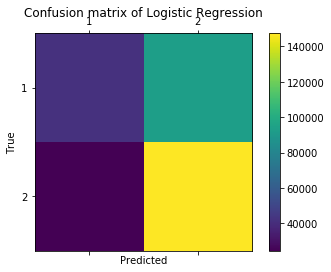

In [61]:
#Construct the Confusion Matrix
labels = ['1', '2']
cm_logreg = confusion_matrix(y_test, y_pred)
print(cm_logreg)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_logreg)
plt.title('Confusion matrix of Logistic Regression')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [62]:
""" K-NEAREST NEIGHBORS """
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)
# Creating confusion matrix and calculatin.g the accuracy score
cm_knn = confusion_matrix(y_test, y_pred)
as_knn=accuracy_score(y_test, y_pred)

[[ 46513  89168]
 [ 41846 130060]]


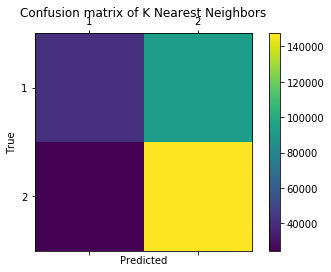

In [63]:
#Construct the Confusion Matrix
labels = ['1', '2', '3']
cm_knn = confusion_matrix(y_test, y_pred,)
print(cm_knn)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_logreg)
plt.title('Confusion matrix of K Nearest Neighbors')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [64]:
""" DECISION TREE CLASSIFICATION """
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000)
dtclassifier.fit(X_train, y_train)
y_pred = dtclassifier.predict(X_test)
# Creating confusion matrix and calculating the accuracy score
cm_dtc = confusion_matrix(y_test, y_pred)
as_dtc = accuracy_score(y_test, y_pred)


[[125968      0]
 [     0      0]]


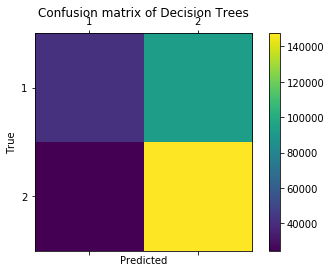

In [69]:
#Construct the Confusion Matrix
labels = ['1', '2']
cm_dtc = confusion_matrix(y_test, y_pred,labels=[1,2])
print(cm_dtc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_logreg)
plt.title('Confusion matrix of Decision Trees')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
""" RANDOM FOREST CLASSIFIER """
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rfclassifier.fit(X_train, y_train)
y_pred = rfclassifier.predict(X_test)
# Creating confusion matrix and calculating the accuracy score
cm_rfc = confusion_matrix(y_test, y_pred)
as_rfc = accuracy_score(y_test, y_pred)

[[125968      0]
 [     0      0]]


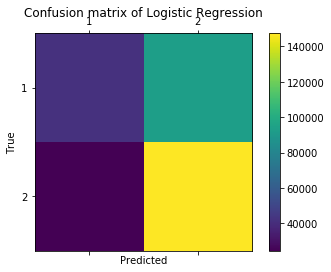

In [67]:
#Construct the Confusion Matrix
labels = ['1', '2']
cm_rfc = confusion_matrix(y_test, y_pred,labels=[1,2])
print(cm_rfc)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_logreg)
plt.title('Confusion matrix of Logistic Regression')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
# Evaluating the best method to use
score={'as_logreg':as_logreg, 'as_knn':as_knn,'as_dtc':as_dtc, 'as_rfc':as_rfc}
score_list=[]
for i in score:
    score_list.append(score[i])
    u=max(score_list)
    if score[i]==u:
        v=i  
    print(f"{i}={score[i]}");   
print(f"The best accuracy score in this case is {v} with accuracy score {u}")

as_logreg=0.6157965063542997
as_knn=0.5740587215974667
as_dtc=0.582033701034179
as_rfc=0.5841274176086766
The best accuracy score in this case is as_logreg with accuracy score 0.6157965063542997
